In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
x=df.iloc[:,2:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

[308812.7800000001,
 221087.1962719298,
 158744.97108013942,
 104366.151455562,
 97211.84353980474,
 68275.94428646985,
 51448.36126259325,
 44640.028048530425,
 42081.855308685335,
 38378.73890793209]

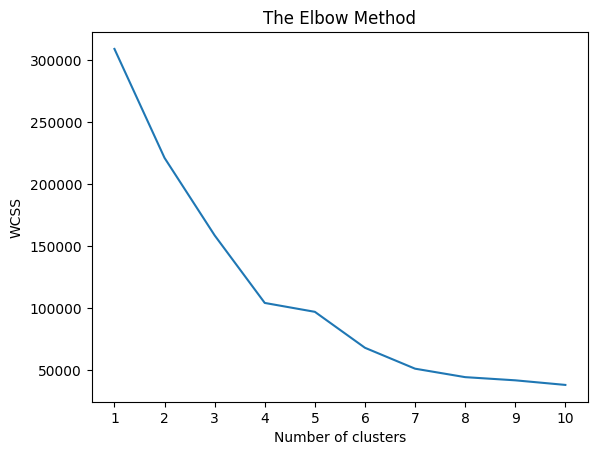

In [ ]:
plt.xticks(np.arange(1,11))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans=KMeans(n_clusters=7,init='k-means++',random_state=42)
kmeans.fit(x)
y_pred=kmeans.predict(x)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
x['cluster']=y_pred
x

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [ ]:
x_new=x.iloc[:,:-1]
y=x['cluster']
x_new

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=42)
y_train.to_string()

'169    4\n97     6\n31     2\n12     5\n35     2\n119    0\n42     5\n189    1\n90     0\n136    3\n51     6\n127    4\n162    3\n41     2\n118    0\n113    6\n26     5\n139    4\n100    6\n111    6\n2      5\n77     6\n46     0\n187    1\n191    1\n85     0\n161    4\n36     5\n190    3\n61     6\n22     5\n141    4\n101    0\n33     2\n11     2\n194    3\n159    4\n6      5\n27     2\n120    6\n4      5\n32     5\n142    6\n145    4\n109    0\n144    3\n10     5\n62     0\n112    6\n146    3\n166    3\n0      5\n198    3\n153    4\n70     0\n123    4\n64     0\n44     5\n163    4\n28     5\n40     0\n108    0\n155    4\n156    3\n25     2\n23     2\n184    3\n147    4\n81     6\n39     2\n168    3\n47     6\n94     6\n154    3\n43     2\n138    3\n3      2\n105    6\n53     0\n133    4\n180    3\n178    3\n185    4\n49     6\n80     0\n34     5\n7      2\n110    0\n91     6\n83     0\n176    3\n181    4\n89     0\n8      5\n13     2\n59     0\n171    4\n131    4\n17     2\n72     0\

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lst=[KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for i in lst:
  model=i
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print(accuracy_score(y_test,y_pred))


KNeighborsClassifier()
0.9833333333333333
GaussianNB()
0.9666666666666667
SVC()
0.9833333333333333
DecisionTreeClassifier()
0.9
RandomForestClassifier()
0.9333333333333333


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333